# Volatility
- Different ways to look at it
- Here we will use: Average True Range (ATR)

### What is Volatility?
- Volatility has a number of different meanings
- We use it in relation to price movement
- Can be thought as the equivalent as risk

### Resourses
- Volatility https://www.investopedia.com/terms/v/volatility.asp
- Average True Range https://www.investopedia.com/terms/a/atr.asp
- Matplotlib http://matplotlib.org (https://youtu.be/2ywUfs0rgtU)

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500


### Formula
$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close


In [5]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [6]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [7]:
true_range = np.max(df, axis=1)

In [8]:
average_true_range = true_range.rolling(14).mean()

In [9]:
average_true_range

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2023-03-24    12.439290
2023-03-27    12.750004
2023-03-28    13.175720
2023-03-29    12.582864
2023-03-30    12.687864
Length: 817, dtype: float64

In [10]:
true_range.rolling(14).sum()/14

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2023-03-24    12.439290
2023-03-27    12.750004
2023-03-28    13.175720
2023-03-29    12.582864
2023-03-30    12.687864
Length: 817, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


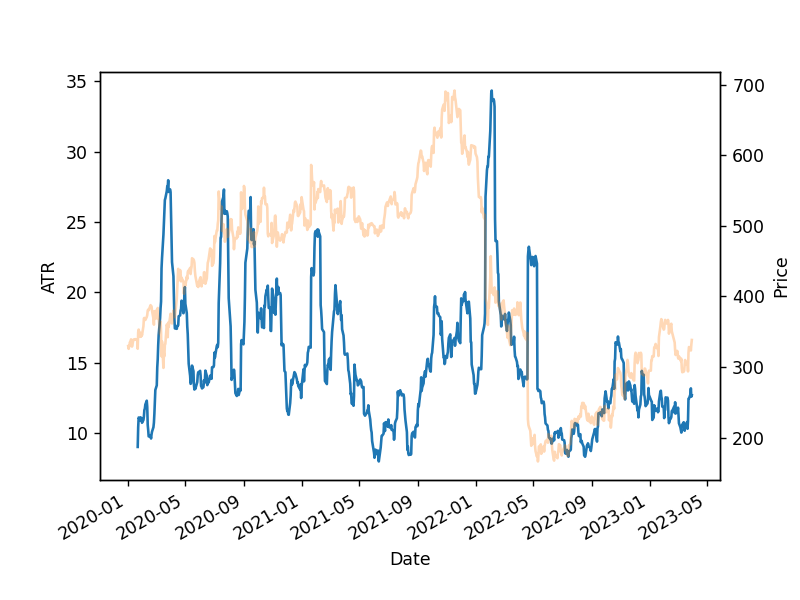

Text(0, 0.5, 'Price')

In [12]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")